**KNN**

According to this algorithm, which is used in classification, feature extraction during classification is used to look at the closeness of the new individual to be categorized to k of the previous individuals.
For example, you want to classify a new element for k = 3. in this case the nearest 3 of the old classified elements are taken. If these elements are included in the class, the new element is also included in that class. The euclide distance can be used in the distance calculation.

# Project - Classify Type of Patient from the biomechanical features of orthopedic patients.

# Install the necessary libraries


In [1]:
#import all libraries
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier

# import data 


In [2]:
class2_data = pd.read_csv('2Classdata.csv')

# Explore the dataset

Look at the head and tail of dataset.
Find the missing value.
Look at the unique values of class values.
Look at the distribution of class values and other attributes.
Get the datatype information about the dataset
Plot the distribution of different classes for pelvic_radius and sacral_slope for visualization.

In [3]:
#perform some EDA
class2_data.head()

,pelvic_incidence,pelvic_tilt numeric,lumbar_lordosis_angle,sacral_slope,pelvic_radius,degree_spondylolisthesis,class
0,63.027818,22.552586,39.609117,40.475232,98.672917,-0.254400,Abnormal
1,39.056951,10.060991,25.015378,28.995960,114.405425,4.564259,Abnormal
2,68.832021,22.218482,50.092194,46.613539,105.985135,-3.530317,Abnormal
3,69.297008,24.652878,44.311238,44.644130,101.868495,11.211523,Abnormal
4,49.712859,9.652075,28.317406,40.060784,108.168725,7.918501,Abnormal


In [4]:
class2_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 310 entries, 0 to 309
Data columns (total 7 columns):
pelvic_incidence            310 non-null float64
pelvic_tilt numeric         310 non-null float64
lumbar_lordosis_angle       310 non-null float64
sacral_slope                310 non-null float64
pelvic_radius               310 non-null float64
degree_spondylolisthesis    310 non-null float64
class                       310 non-null object
dtypes: float64(6), object(1)
memory usage: 17.0+ KB


In [5]:
class2_data.describe()

,pelvic_incidence,pelvic_tilt numeric,lumbar_lordosis_angle,sacral_slope,pelvic_radius,degree_spondylolisthesis
count,310.000000,310.000000,310.000000,310.000000,310.000000,310.000000
mean,60.496653,17.542822,51.930930,42.953831,117.920655,26.296694
std,17.236520,10.008330,18.554064,13.423102,13.317377,37.559027
min,26.147921,-6.554948,14.000000,13.366931,70.082575,-11.058179
25%,46.430294,10.667069,37.000000,33.347122,110.709196,1.603727
50%,58.691038,16.357689,49.562398,42.404912,118.268178,11.767934
75%,72.877696,22.120395,63.000000,52.695888,125.467674,41.287352
max,129.834041,49.431864,125.742385,121.429566,163.071041,418.543082


In [6]:
class2_data.corr() #to check for the correlations between 

,pelvic_incidence,pelvic_tilt numeric,lumbar_lordosis_angle,sacral_slope,pelvic_radius,degree_spondylolisthesis
pelvic_incidence,1.000000,0.629199,0.717282,0.814960,-0.247467,0.638743
pelvic_tilt numeric,0.629199,1.000000,0.432764,0.062345,0.032668,0.397862
lumbar_lordosis_angle,0.717282,0.432764,1.000000,0.598387,-0.080344,0.533667
sacral_slope,0.814960,0.062345,0.598387,1.000000,-0.342128,0.523557
pelvic_radius,-0.247467,0.032668,-0.080344,-0.342128,1.000000,-0.026065
degree_spondylolisthesis,0.638743,0.397862,0.533667,0.523557,-0.026065,1.000000


From the correlation analysis one can say pelvic incidence and sacral slope are related, because of high correlation value (0.81).

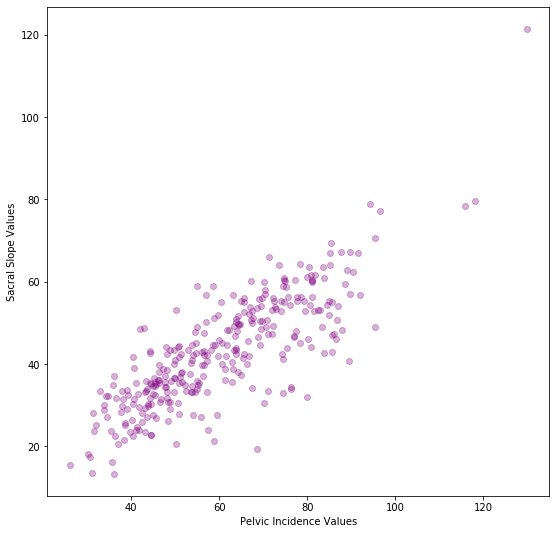

In [7]:
# Now visualize the values for pelvic incidence and sacral slope:
plt.figure(figsize=(9,9))
plt.scatter(x=class2_data['pelvic_incidence'], y=class2_data['sacral_slope'], color='purple', alpha=0.3)
plt.xlabel('Pelvic Incidence Values')
plt.ylabel('Sacral Slope Values')
plt.show()

we can see if pelvic incidence value is high, sacral slope value of the patient is high as well.

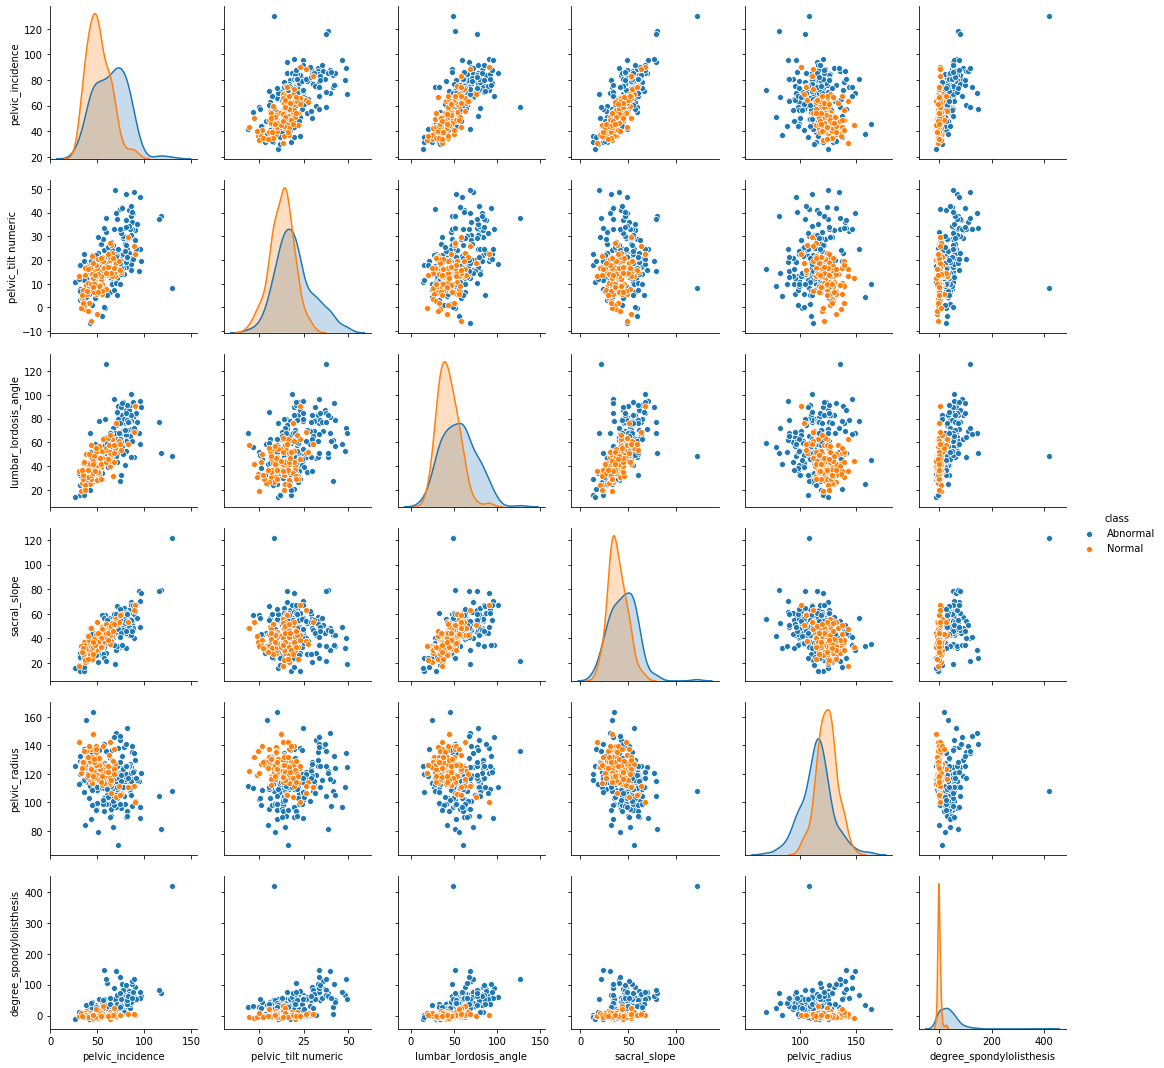

In [8]:
#plot all the scenarios for the data
sns.pairplot(class2_data, hue= 'class', diag_kind= 'kde')

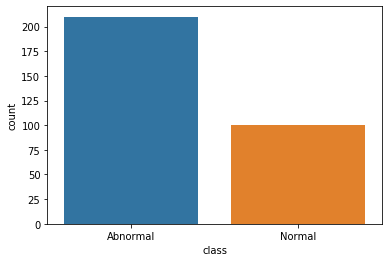

In [9]:
sns.countplot(x="class", data=class2_data)

In [10]:
class2_data.loc[:,'class'].value_counts()

Abnormal    210
Normal      100
Name: class, dtype: int64

# Encode the Class variable to integer.

In [11]:
#initiate the label encoder
le = LabelEncoder()
class2_data['class'] = le.fit_transform(class2_data['class'])

# Create the X(Feature-set) and Y(Target-set) sets for your Data.

In [12]:
y = class2_data['class'] 

In [13]:
x = class2_data.drop(["class"], axis=1)

# Normalize your Data (X) to get values between 0 to 1.

# Split the dat as train and test with a ratio of 70:30.

In [14]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=4)

In [15]:
#initiate standard scaler to normalize the data
sc=StandardScaler()

In [16]:
scaledX_train = sc.fit_transform(x_train)

In [17]:
scaledX_test = sc.transform(x_test)

# Build the KNN model using Train Dataset and predict the class on test dataset.

## Calculate the performance score of of your classification on test dataset.

In [18]:
#Built the KNN model for values of K=1 to 29 and calculated the score for them
score_list = []  
for each in range(1,30):
    knn2 = KNeighborsClassifier(n_neighbors = each)
    knn2.fit(scaledX_train,y_train)
    score_list.append(knn2.score(scaledX_test,y_test))


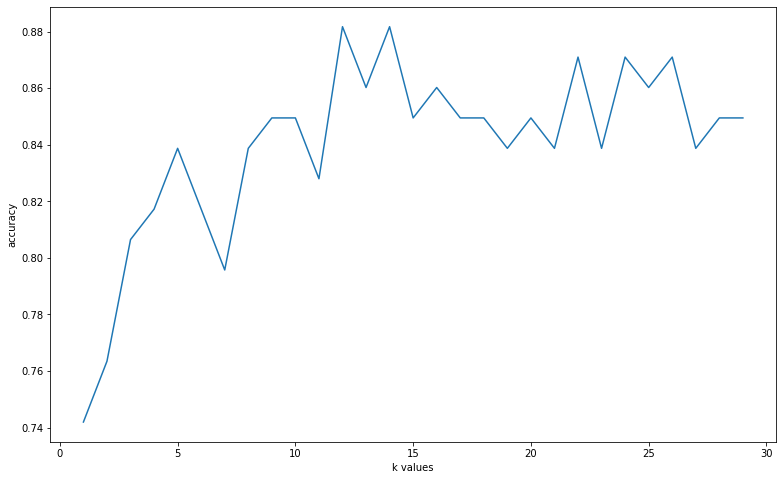

In [19]:
#Plot the score values 
plt.figure(figsize=[13,8])
plt.plot(range(1,30),score_list)
plt.xlabel("k values")
plt.ylabel("accuracy")
plt.show()

# Find the best K value for your classifcation

In [20]:
# Model to find the best value for K
rand = np.arange(1,30)
train_accuracy = []
test_accuracy = []
# Loop over different values of k
for i, k in enumerate(rand):
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(scaledX_train, y_train)
    train_accuracy.append(knn.score(scaledX_train, y_train))  # train accuracy
    test_accuracy.append(knn.score(scaledX_test, y_test))     # test accuracy

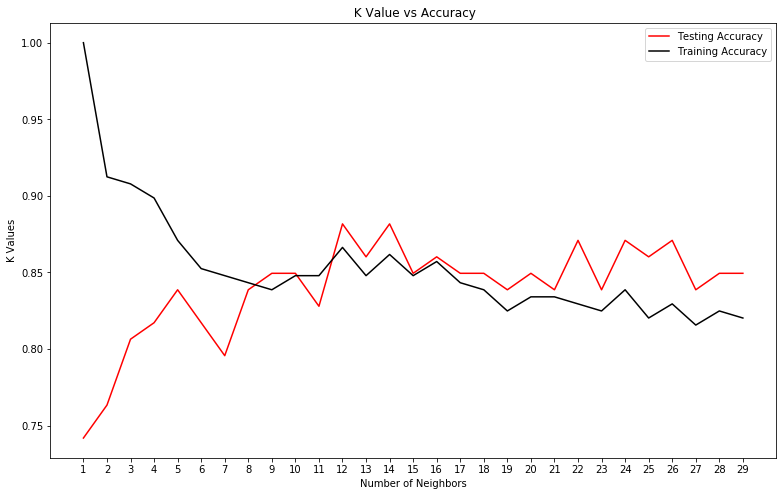

In [21]:
# Plot the graph for different K values
plt.figure(figsize=[13,8])
plt.plot(rand, test_accuracy, label='Testing Accuracy' , color='red')
plt.plot(rand, train_accuracy, label='Training Accuracy', color='black')
plt.legend()
plt.title(' K Value vs Accuracy')
plt.xlabel('Number of Neighbors')
plt.ylabel('K Values')
plt.xticks(rand)
plt.show()

In [22]:
print("Best accuracy is {} with K = {}".format(np.max(test_accuracy), 1+test_accuracy.index(np.max(test_accuracy))))

Best accuracy is 0.8817204301075269 with K = 12


# import data for 3 Class Classifcation and repeat all the steps which are given above.

In [23]:
class3_data = pd.read_csv('3Classdata.csv')

In [24]:
#perform some EDA
class3_data.head()

,pelvic_incidence,pelvic_tilt,lumbar_lordosis_angle,sacral_slope,pelvic_radius,degree_spondylolisthesis,class
0,63.027818,22.552586,39.609117,40.475232,98.672917,-0.254400,Hernia
1,39.056951,10.060991,25.015378,28.995960,114.405425,4.564259,Hernia
2,68.832021,22.218482,50.092194,46.613539,105.985135,-3.530317,Hernia
3,69.297008,24.652878,44.311238,44.644130,101.868495,11.211523,Hernia
4,49.712859,9.652075,28.317406,40.060784,108.168725,7.918501,Hernia


In [25]:
class3_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 310 entries, 0 to 309
Data columns (total 7 columns):
pelvic_incidence            310 non-null float64
pelvic_tilt                 310 non-null float64
lumbar_lordosis_angle       310 non-null float64
sacral_slope                310 non-null float64
pelvic_radius               310 non-null float64
degree_spondylolisthesis    310 non-null float64
class                       310 non-null object
dtypes: float64(6), object(1)
memory usage: 17.0+ KB


In [26]:
class3_data.describe()

,pelvic_incidence,pelvic_tilt,lumbar_lordosis_angle,sacral_slope,pelvic_radius,degree_spondylolisthesis
count,310.000000,310.000000,310.000000,310.000000,310.000000,310.000000
mean,60.496653,17.542822,51.930930,42.953831,117.920655,26.296694
std,17.236520,10.008330,18.554064,13.423102,13.317377,37.559027
min,26.147921,-6.554948,14.000000,13.366931,70.082575,-11.058179
25%,46.430294,10.667069,37.000000,33.347122,110.709196,1.603727
50%,58.691038,16.357689,49.562398,42.404912,118.268178,11.767934
75%,72.877696,22.120395,63.000000,52.695888,125.467674,41.287352
max,129.834041,49.431864,125.742385,121.429566,163.071041,418.543082


In [27]:
class3_data.corr() #to check for the correlations between 

,pelvic_incidence,pelvic_tilt,lumbar_lordosis_angle,sacral_slope,pelvic_radius,degree_spondylolisthesis
pelvic_incidence,1.000000,0.629199,0.717282,0.814960,-0.247467,0.638743
pelvic_tilt,0.629199,1.000000,0.432764,0.062345,0.032668,0.397862
lumbar_lordosis_angle,0.717282,0.432764,1.000000,0.598387,-0.080344,0.533667
sacral_slope,0.814960,0.062345,0.598387,1.000000,-0.342128,0.523557
pelvic_radius,-0.247467,0.032668,-0.080344,-0.342128,1.000000,-0.026065
degree_spondylolisthesis,0.638743,0.397862,0.533667,0.523557,-0.026065,1.000000


From the correlation analysis one can say pelvic incidence and sacral slope are related, because of high correlation value (0.81).

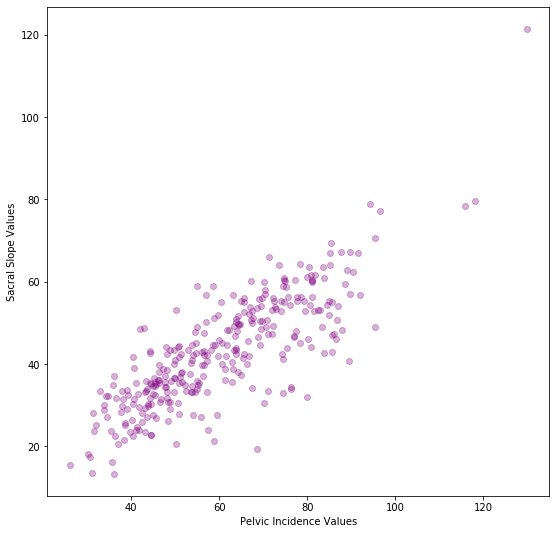

In [28]:
# Now visualize the values for pelvic incidence and sacral slope:
plt.figure(figsize=(9,9))
plt.scatter(x=class3_data['pelvic_incidence'], y=class3_data['sacral_slope'], color='purple', alpha=0.3)
plt.xlabel('Pelvic Incidence Values')
plt.ylabel('Sacral Slope Values')
plt.show()


we can see if pelvic incidence value is high, sacral slope value of the patient is high as well.

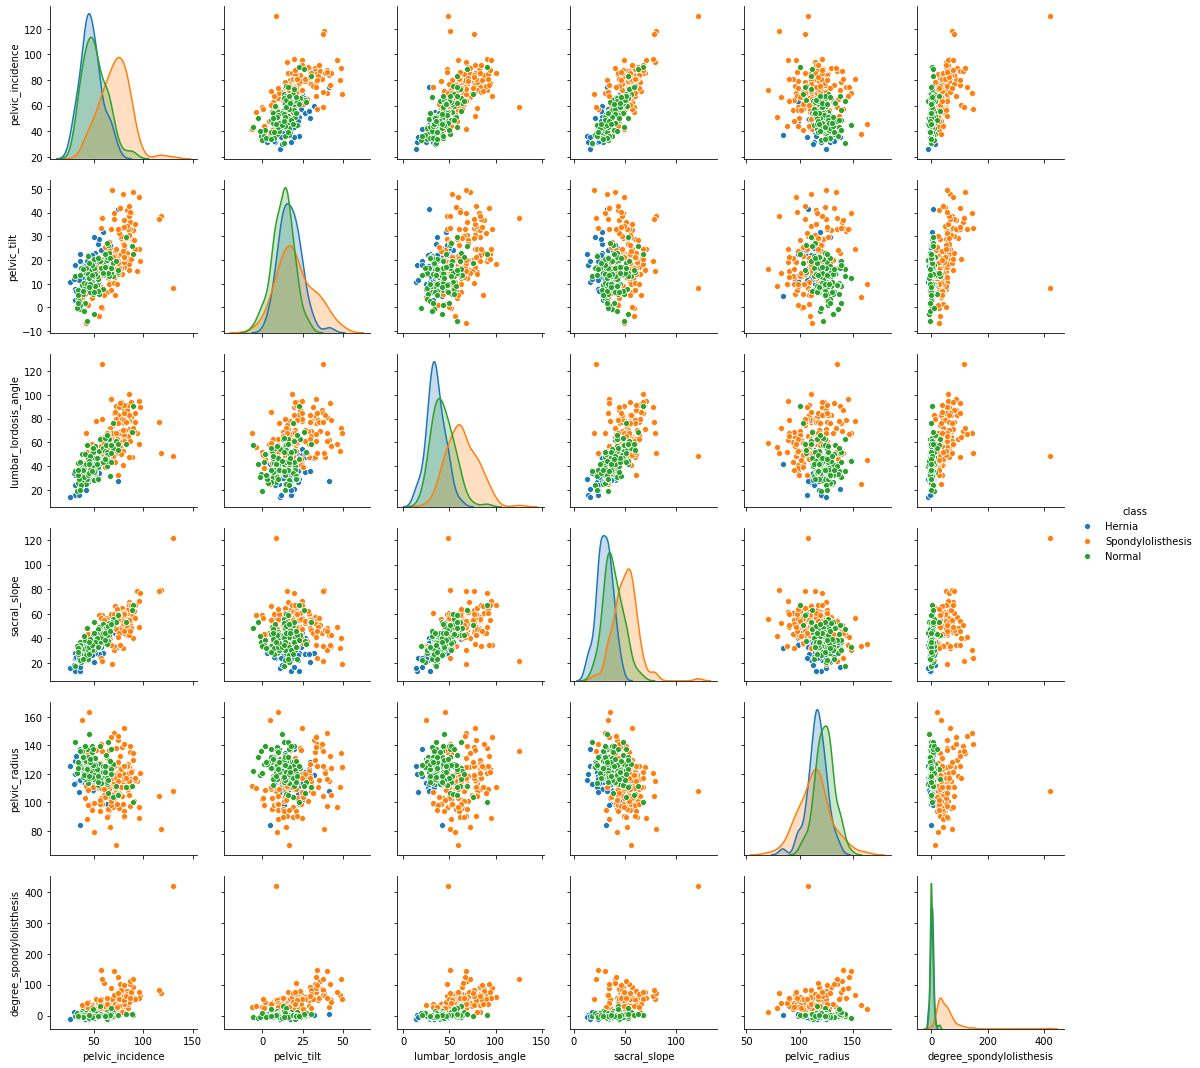

In [29]:
#plot all the scenarios for the data
sns.pairplot(class3_data, hue= 'class', diag_kind= 'kde')

Spondylolisthesis    150
Normal               100
Hernia                60
Name: class, dtype: int64

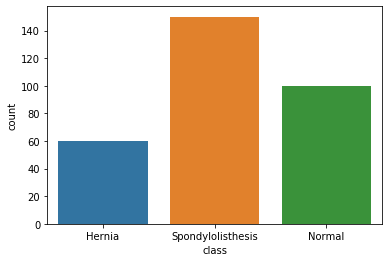

In [30]:
# count the variables in class object
sns.countplot(x="class", data=class3_data)
class3_data.loc[:,'class'].value_counts()

In [31]:
#initiate the label encoder
le = LabelEncoder()
class3_data['class'] = le.fit_transform(class3_data['class'])

In [32]:
#split the data between independent variable and target variable
y = class3_data['class'] 
x = class3_data.drop(["class"], axis=1)

In [33]:
#split the data into train test with ratio 70:30
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=4)

In [34]:
#initiate the standard scaler to normalize the data
sc=StandardScaler()
scaledX_train = sc.fit_transform(x_train)
scaledX_test = sc.transform(x_test)

In [35]:
#Built the KNN model for values of K=1 to 29 and calculated the score for them
score_list = []
for each in range(1,30):
    knn2 = KNeighborsClassifier(n_neighbors = each)
    knn2.fit(scaledX_train,y_train)
    score_list.append(knn2.score(scaledX_test,y_test))

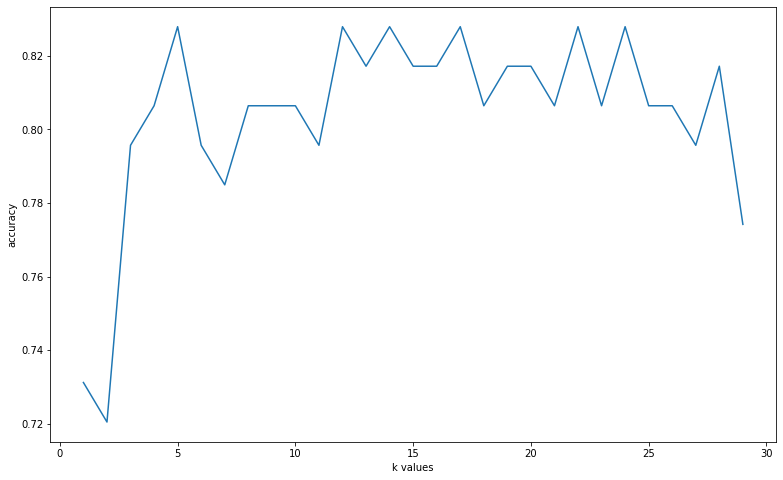

In [36]:
#Plot the score values 
plt.figure(figsize=[13,8])
plt.plot(range(1,30),score_list)
plt.xlabel("k values")
plt.ylabel("accuracy")
plt.show()

In [37]:
# Model to find the best value for K
train_accuracy = []
test_accuracy = []
# Loop over different values of k
for i, k in enumerate(rand):
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(scaledX_train, y_train)
    train_accuracy.append(knn.score(scaledX_train, y_train))  # train accuracy
    test_accuracy.append(knn.score(scaledX_test, y_test))     # test accuracy

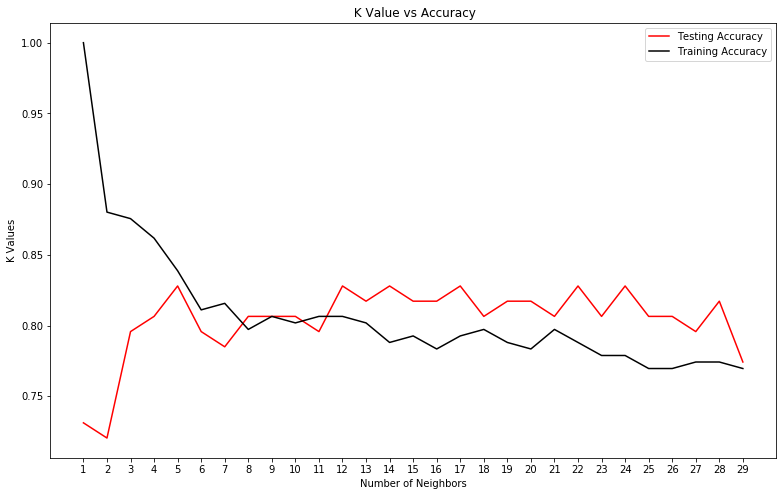

In [38]:
# Plot the graph for different K values
plt.figure(figsize=[13,8])
plt.plot(rand, test_accuracy, label='Testing Accuracy' , color='red')
plt.plot(rand, train_accuracy, label='Training Accuracy', color='black')
plt.legend()
plt.title(' K Value vs Accuracy')
plt.xlabel('Number of Neighbors')
plt.ylabel('K Values')
plt.xticks(rand)
plt.show()

In [39]:
print("Best accuracy is {} with K = {}".format(np.max(test_accuracy), 1+test_accuracy.index(np.max(test_accuracy))))

Best accuracy is 0.8279569892473119 with K = 5
